**Общая информация**

**Срок сдачи:** 16 марта 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups as fetch_mldata,fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score, precision_score
from scipy.spatial.distance import minkowski
from scipy.spatial.distance import cdist
from  scipy.stats import mode
from sklearn.metrics.pairwise import pairwise_distances

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric

    def fit(self, X, y):
        self.X_train = X
        self.Y_train = y
    
    def predict(self, X):
        self.X_test = X
        if self.algorithm == 'brute': return self.predict_brute()
        elif self.algorithm == 'kd_tree': return self.predict_kdtree()

    def predict_brute(self):
        best_ind  = pairwise_distances(self.X_test, self.X_train, metric = self.metric).argsort(axis=1)[:,:self.n_neighbors]
        vot = self.Y_train[best_ind]
        return mode(vot, axis = 1)[0].flatten()
    
    def predict_kdtree(self):
        tree = KDTree(self.X_train, metric = 'minkowski') 
        best_ind = tree.query(self.X_test, k=self.n_neighbors, return_distance = False)
        vot = self.Y_train[best_ind]
        return mode(vot, axis = 1)[0].flatten()

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

Wall time: 995 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [9]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [10]:
%time clf.predict(X_test)

Wall time: 6 ms


array([0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2])

In [11]:
%time my_clf.predict(X_test)

Wall time: 4 ms


array([0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

Wall time: 10 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [15]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [16]:
%time clf.predict(X_test)

Wall time: 4.98 ms


array([2, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0])

In [17]:
%time my_clf.predict(X_test)

Wall time: 0 ns


array([2, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [23]:
from sklearn.model_selection import StratifiedKFold

In [24]:
gkf = StratifiedKFold(n_splits=3)

In [25]:
scores = []
for k in range(1,11):
    my_clf = MyKNeighborsClassifier(n_neighbors=k, algorithm='brute')
    score =  0
    for train, test in gkf.split(vectors, target):
        my_clf.fit(vectors[train], target[train])
        pred = my_clf.predict(vectors[test])
        score += accuracy_score(pred, target[test]) 
    scores.append(score/3.)        

In [26]:
from matplotlib.pyplot import plot

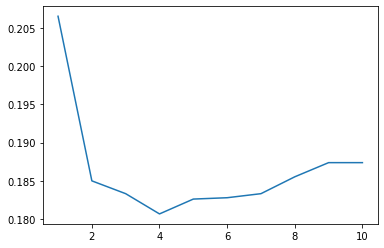

In [27]:
plot(range(1,11), scores)

Пробуем косинусную метрику:


In [28]:
scores = []
for k in range(1,11):
    my_clf = MyKNeighborsClassifier(n_neighbors=k, algorithm='brute', metric = 'cosine')
    score = 0
    for train, test in gkf.split(vectors, target):
        my_clf.fit(vectors[train], target[train])
        pred = my_clf.predict(vectors[test])
        score += accuracy_score(pred, target[test]) 
    scores.append(score/3.)        

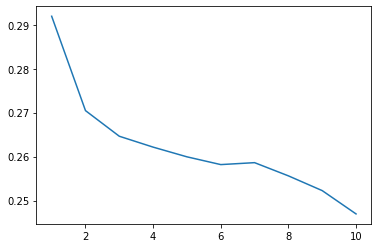

In [30]:
plot(range(1,11), scores)

Пробуем Tfidf:

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data)

In [32]:
scores = []
for k in range(1,11):
    my_clf = MyKNeighborsClassifier(n_neighbors=k, algorithm='brute', metric='cosine')
    score = 0
    for train, test in gkf.split(vectors, target):
        my_clf.fit(vectors[train], target[train])
        pred = my_clf.predict(vectors[test])
        score += accuracy_score(pred, target[test]) 
    scores.append(score/3.)    

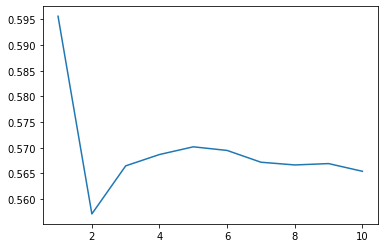

In [33]:
plot(range(1,11), scores)

Лучшая модель - косинусная метрика плюс TdIdf-векторизация. Число 
соседей  равно 1.

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [34]:
newsgroups_test = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [35]:
data_test = newsgroups_test['data']
target_test = newsgroups_test['target']

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [36]:
vectors_test = vectorizer.transform(data_test)

In [37]:
my_clf = MyKNeighborsClassifier(n_neighbors=1, algorithm='brute', metric='cosine')

In [38]:
my_clf.fit(vectors, target)

In [39]:
pred = my_clf.predict(vectors_test)

In [40]:
accuracy_score(pred, target_test) 

0.5088953797132236

Результат несколько хуже, чем на валидационной выборке. Это может быть связано с тем что
1) Параметр n_neighbors оптимален для валидационной выборки, но не оптимальным для тестовой
2) Тестовая выборка несколько хуже удовлетворяет условию компактности.

Например, для n_neighbors = 8 получаем лучший скор:

In [41]:
my_clf = MyKNeighborsClassifier(n_neighbors=8, algorithm='brute', metric='cosine')
my_clf.fit(vectors, target)
pred = my_clf.predict(vectors_test)
accuracy_score(pred, target_test) 

0.5122145512480085